In [71]:
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np


In [72]:
m1 = 5
(x1, y1) = (1.0, 0.0)
(vx1, vy1) = (0, 0.2)

m2 = 5
(x2, y2) = (-0.5, 0.0)
(vx2, vy2) = (0, -0.1)

In [73]:
def grav(x1, y1, x2, y2):   
    # inverse square law between two particles mass m1, m2
    dx = x2 - x1
    dy = y2 - y1
    r2 = dx * dx + dy * dy
    r3 = r2 ** 1.5
    fx = dx / r3
    fy = dy / r3
    return (fx/m1, fy/m1, -fx/m2, -fy/m2)

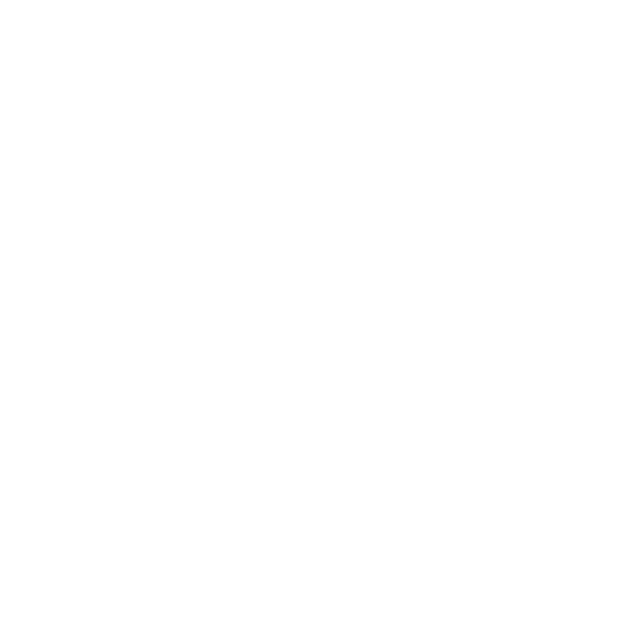

In [74]:
t=0
tend=50
dt = 0.01
NITER = int((tend - t)/dt + 0.5)

ys = np.zeros((4, NITER + 1))
ys [:, 0] = [x1, y1, x2, y2]

(ax1, ay1, ax2, ay2) = grav(x1, y1, x2, y2)
for i in range(NITER):
    vx1 += 0.5 * dt * ax1
    vy1 += 0.5 * dt * ay1
    vx2 += 0.5 * dt * ax2
    vy2 += 0.5 * dt * ay2
    x1 += dt * vx1
    y1 += dt * vy1
    x2 += dt * vx2
    y2 += dt * vy2
    (ax1, ay1, ax2, ay2) = grav(x1, y1, x2, y2)
    vx1 += 0.5 * dt * ax1
    vy1 += 0.5 * dt * ay1
    vx2 += 0.5 * dt * ax2
    vy2 += 0.5 * dt * ay2
    ys [:, i+1] = [x1, y1, x2, y2]

fig = plt.figure(figsize=[6,6])
ax = plt.axes([0., 0., 1., 1.], xlim=(-1.5,1.5), ylim=(-1.5,1.5))
ax.set_aspect('equal')
ax.axis('off')
l = ax.scatter([x1, x2], [y1, y2], c=['blue', 'red'], s=[4, 8])

OUTPUT_FREQ=10 # display every 10 steps only

In [75]:
def animate(i):
    l.set_offsets(np.reshape(ys [0:4, OUTPUT_FREQ * i], (2,2)))

In [76]:
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=int(NITER/OUTPUT_FREQ))

In [77]:
from IPython.display import HTML
HTML(ani.to_jshtml())
